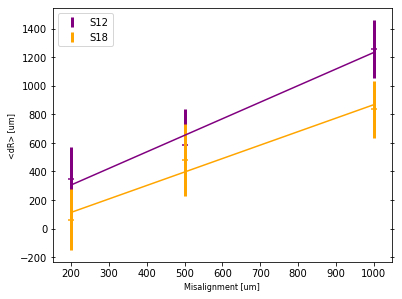

In [20]:
import argparse, sys, os, glob
import os.path
import subprocess
from scipy import stats
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import itertools
import re
import pandas as pd

s12_rad_n = 7.743
s18_rad_n = 9.160
s12_rad_n_error = 0.079
s18_rad_n_error = 0.077

s18_rad_i = [9.222, 9.639, 9.996 ]
s12_rad_i = [8.093, 8.325, 9.002 ]
s12_rad_i_error = [ 0.204, 0.246, 0.186 ]
s18_rad_i_error = [ 0.199, 0.242, 0.184 ]

misalignment = [200, 500, 1000]

for i in range(0, len(misalignment)):
    s12_rad_i[i]=  (s12_rad_i[i] - s12_rad_n) * 1e3 # um 
    s18_rad_i[i]=  (s18_rad_i[i] - s18_rad_n) * 1e3 # um 
#     s12_rad_i_error[i] = np.sqrt(s12_rad_n_error **2 + s12_rad_n_error**2) * 1e3 # um 
#     s18_rad_i_error[i] = np.sqrt(s18_rad_n_error **2 + s18_rad_n_error**2) * 1e3 # um 
    s12_rad_i_error[i] = np.sqrt(s12_rad_i_error[i] **2 + s12_rad_n_error**2) * 1e3 # um 
    s18_rad_i_error[i] = np.sqrt(s18_rad_i_error[i] **2 + s18_rad_n_error**2) * 1e3 # um 
 

S_rad = (s12_rad_i, s18_rad_i)    
S_rad_error = (s12_rad_i_error, s18_rad_i_error)

label=("S12", "S18")
color=("purple", "orange")
 

axes=plt.gca()
axes.xaxis.set_major_locator(MaxNLocator(integer=True)) # int ticks only on x-axis 
# axes.yaxis.set_major_formatter(FormatStrFormatter("%.0f")) # 1 decimal point of y-axis 
axes.tick_params(axis='y', which='both', left=True, right=True, direction='inout') #in-out ticks on y axis 

for i_station in range(0, 2):
    plt.scatter(misalignment, S_rad[i_station],  marker="+", color=str(color[i_station])) # plot all cases and reference points 
    plt.errorbar(misalignment, S_rad[i_station], yerr=S_rad_error[i_station],  color=str(color[i_station]), markersize=14, elinewidth=3, linewidth=0, label=str(label[i_station])) # add error bar
    plt.plot(np.unique(misalignment), np.poly1d(np.polyfit(misalignment, S_rad[i_station], 1))(np.unique(misalignment)), color=str(color[i_station]))

plt.legend(loc='upper left')
plt.xlabel("Misalignment [um]", fontsize=8)
plt.ylabel("<dR> [um]", fontsize=8)

plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=1.0)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(hspace=0.43)
plt.subplots_adjust(right=0.9)
# axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("fom.png", dpi=600)